In [1]:
# transaction fees, gas plot etc.
# compentition
# biggest losses and the transaction before
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import norm
import statistics

rawDf = pd.read_json (r'json_data_manipulation/yieldyak_aave_avax_new.json')

0.0009999999999999916

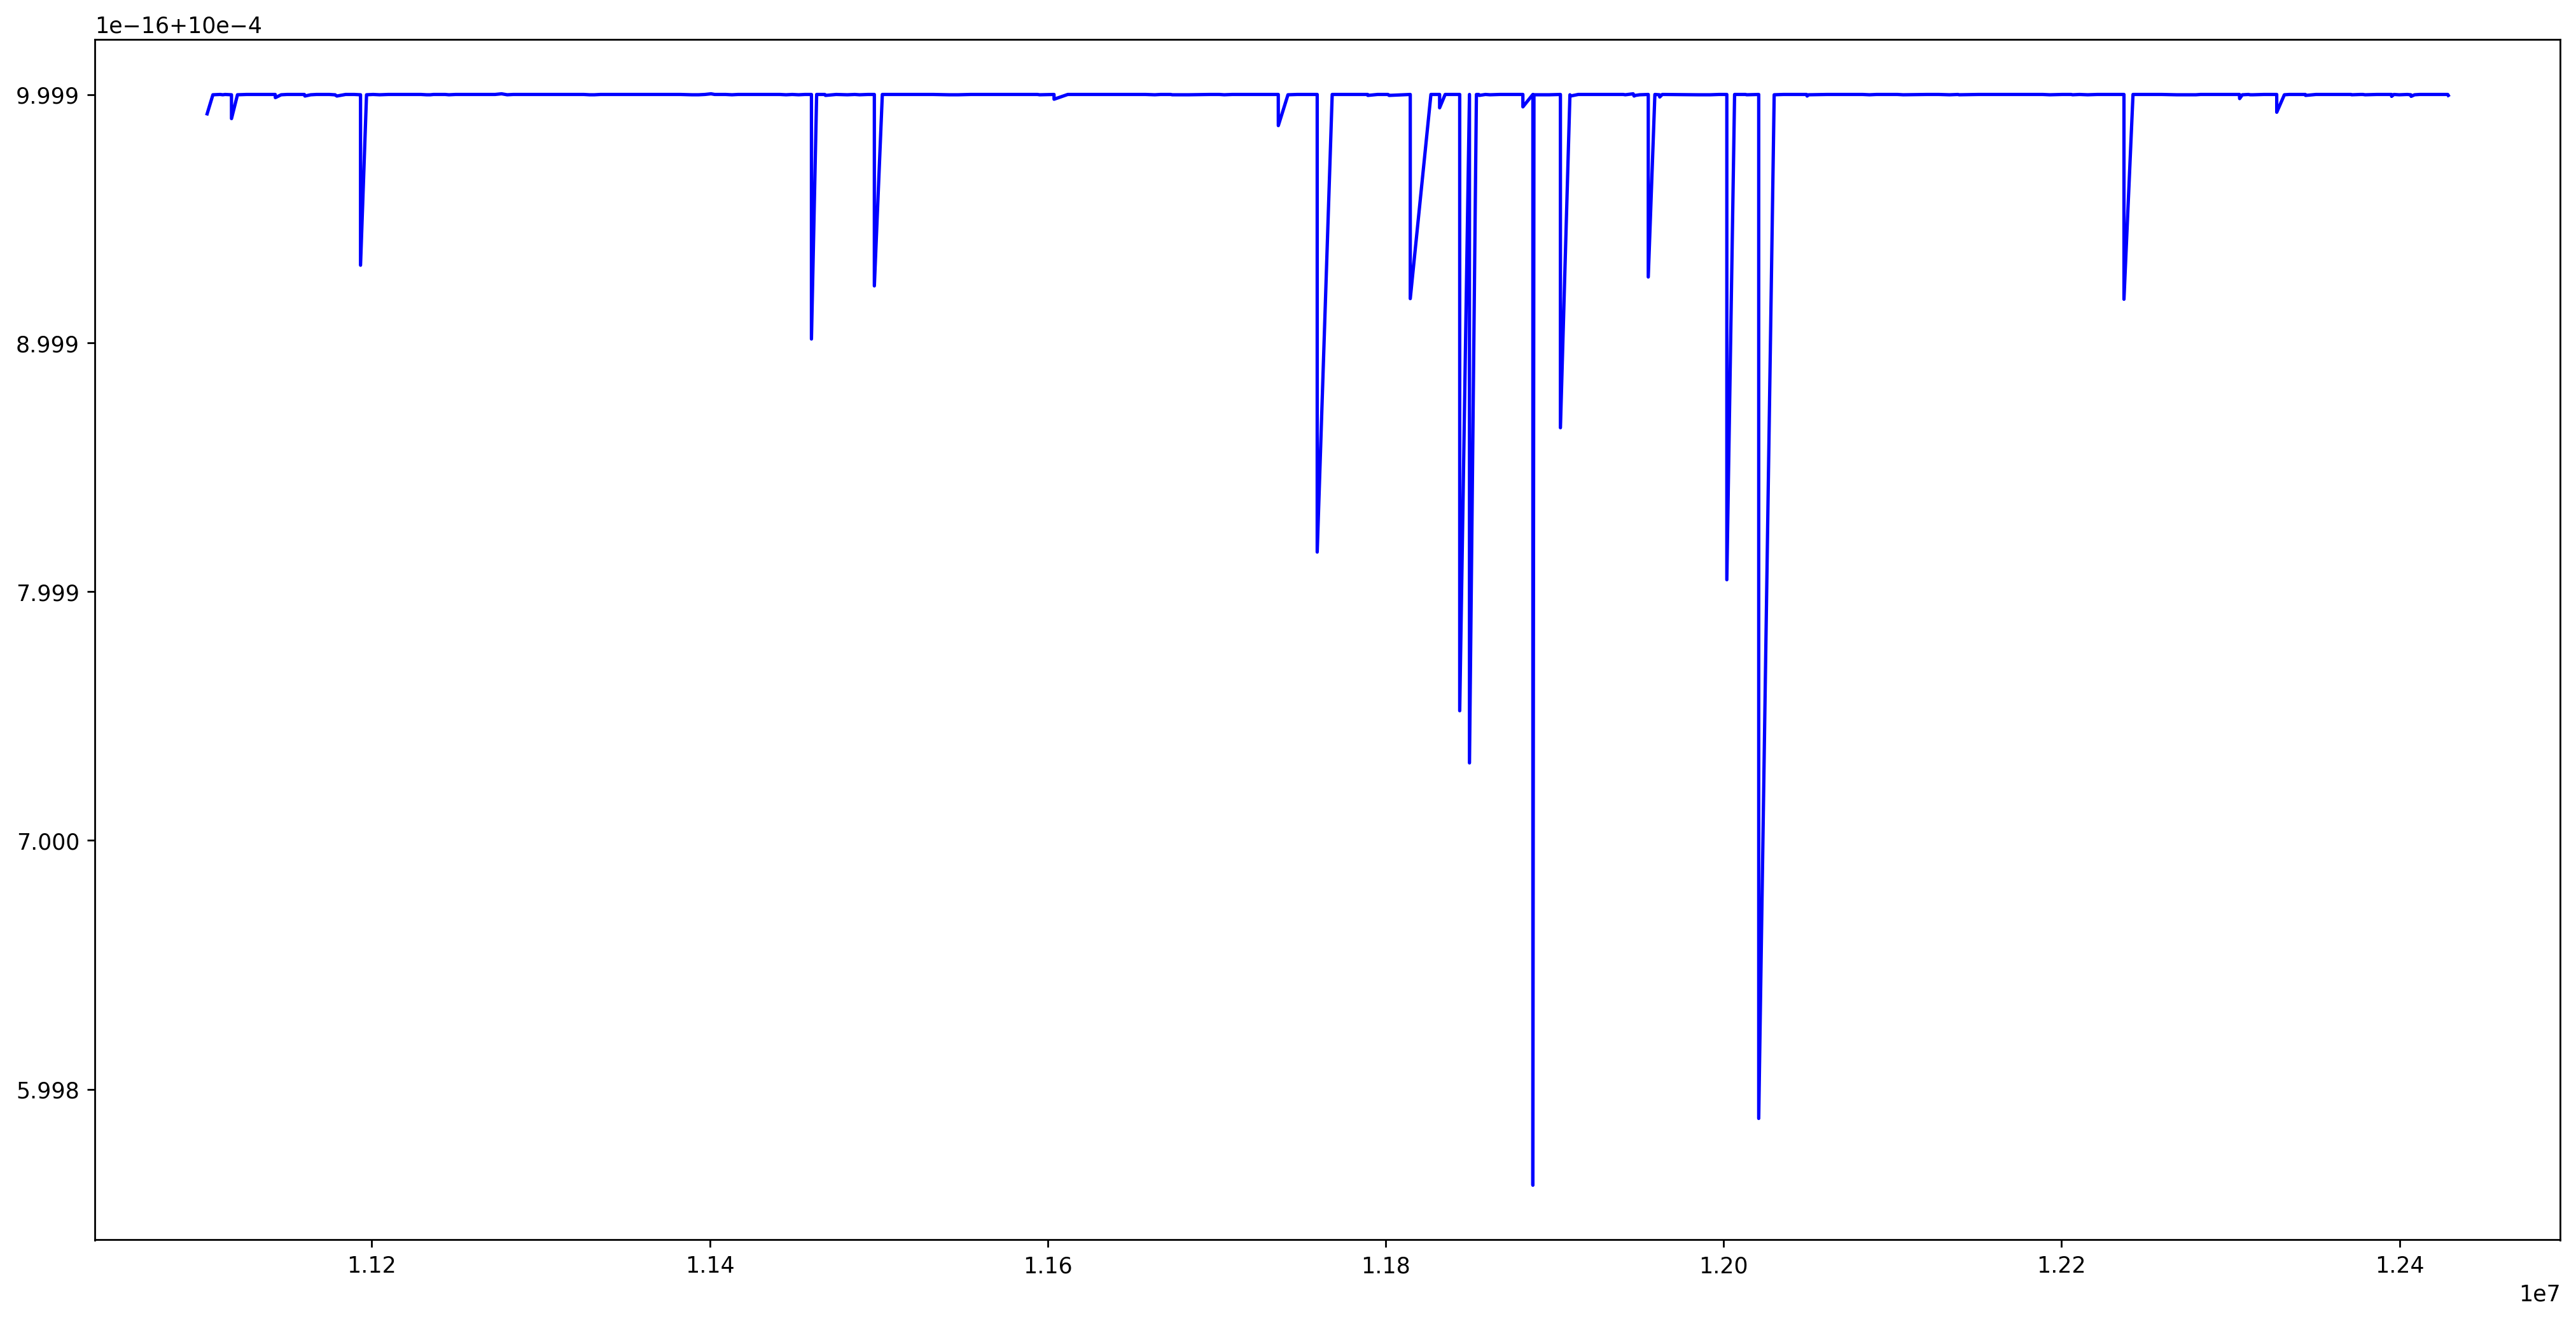

In [2]:
# reward ratio and consistency
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['figure.dpi'] = 250

reward_ratio = rawDf["reinvest_reward"] / rawDf["reinvested_amount"]

plt.plot(rawDf["blocknumber"].values, reward_ratio.values, color='b')
reward_percentage = reward_ratio.mean()
print(reward_percentage)

mean: -0.007962446354946489


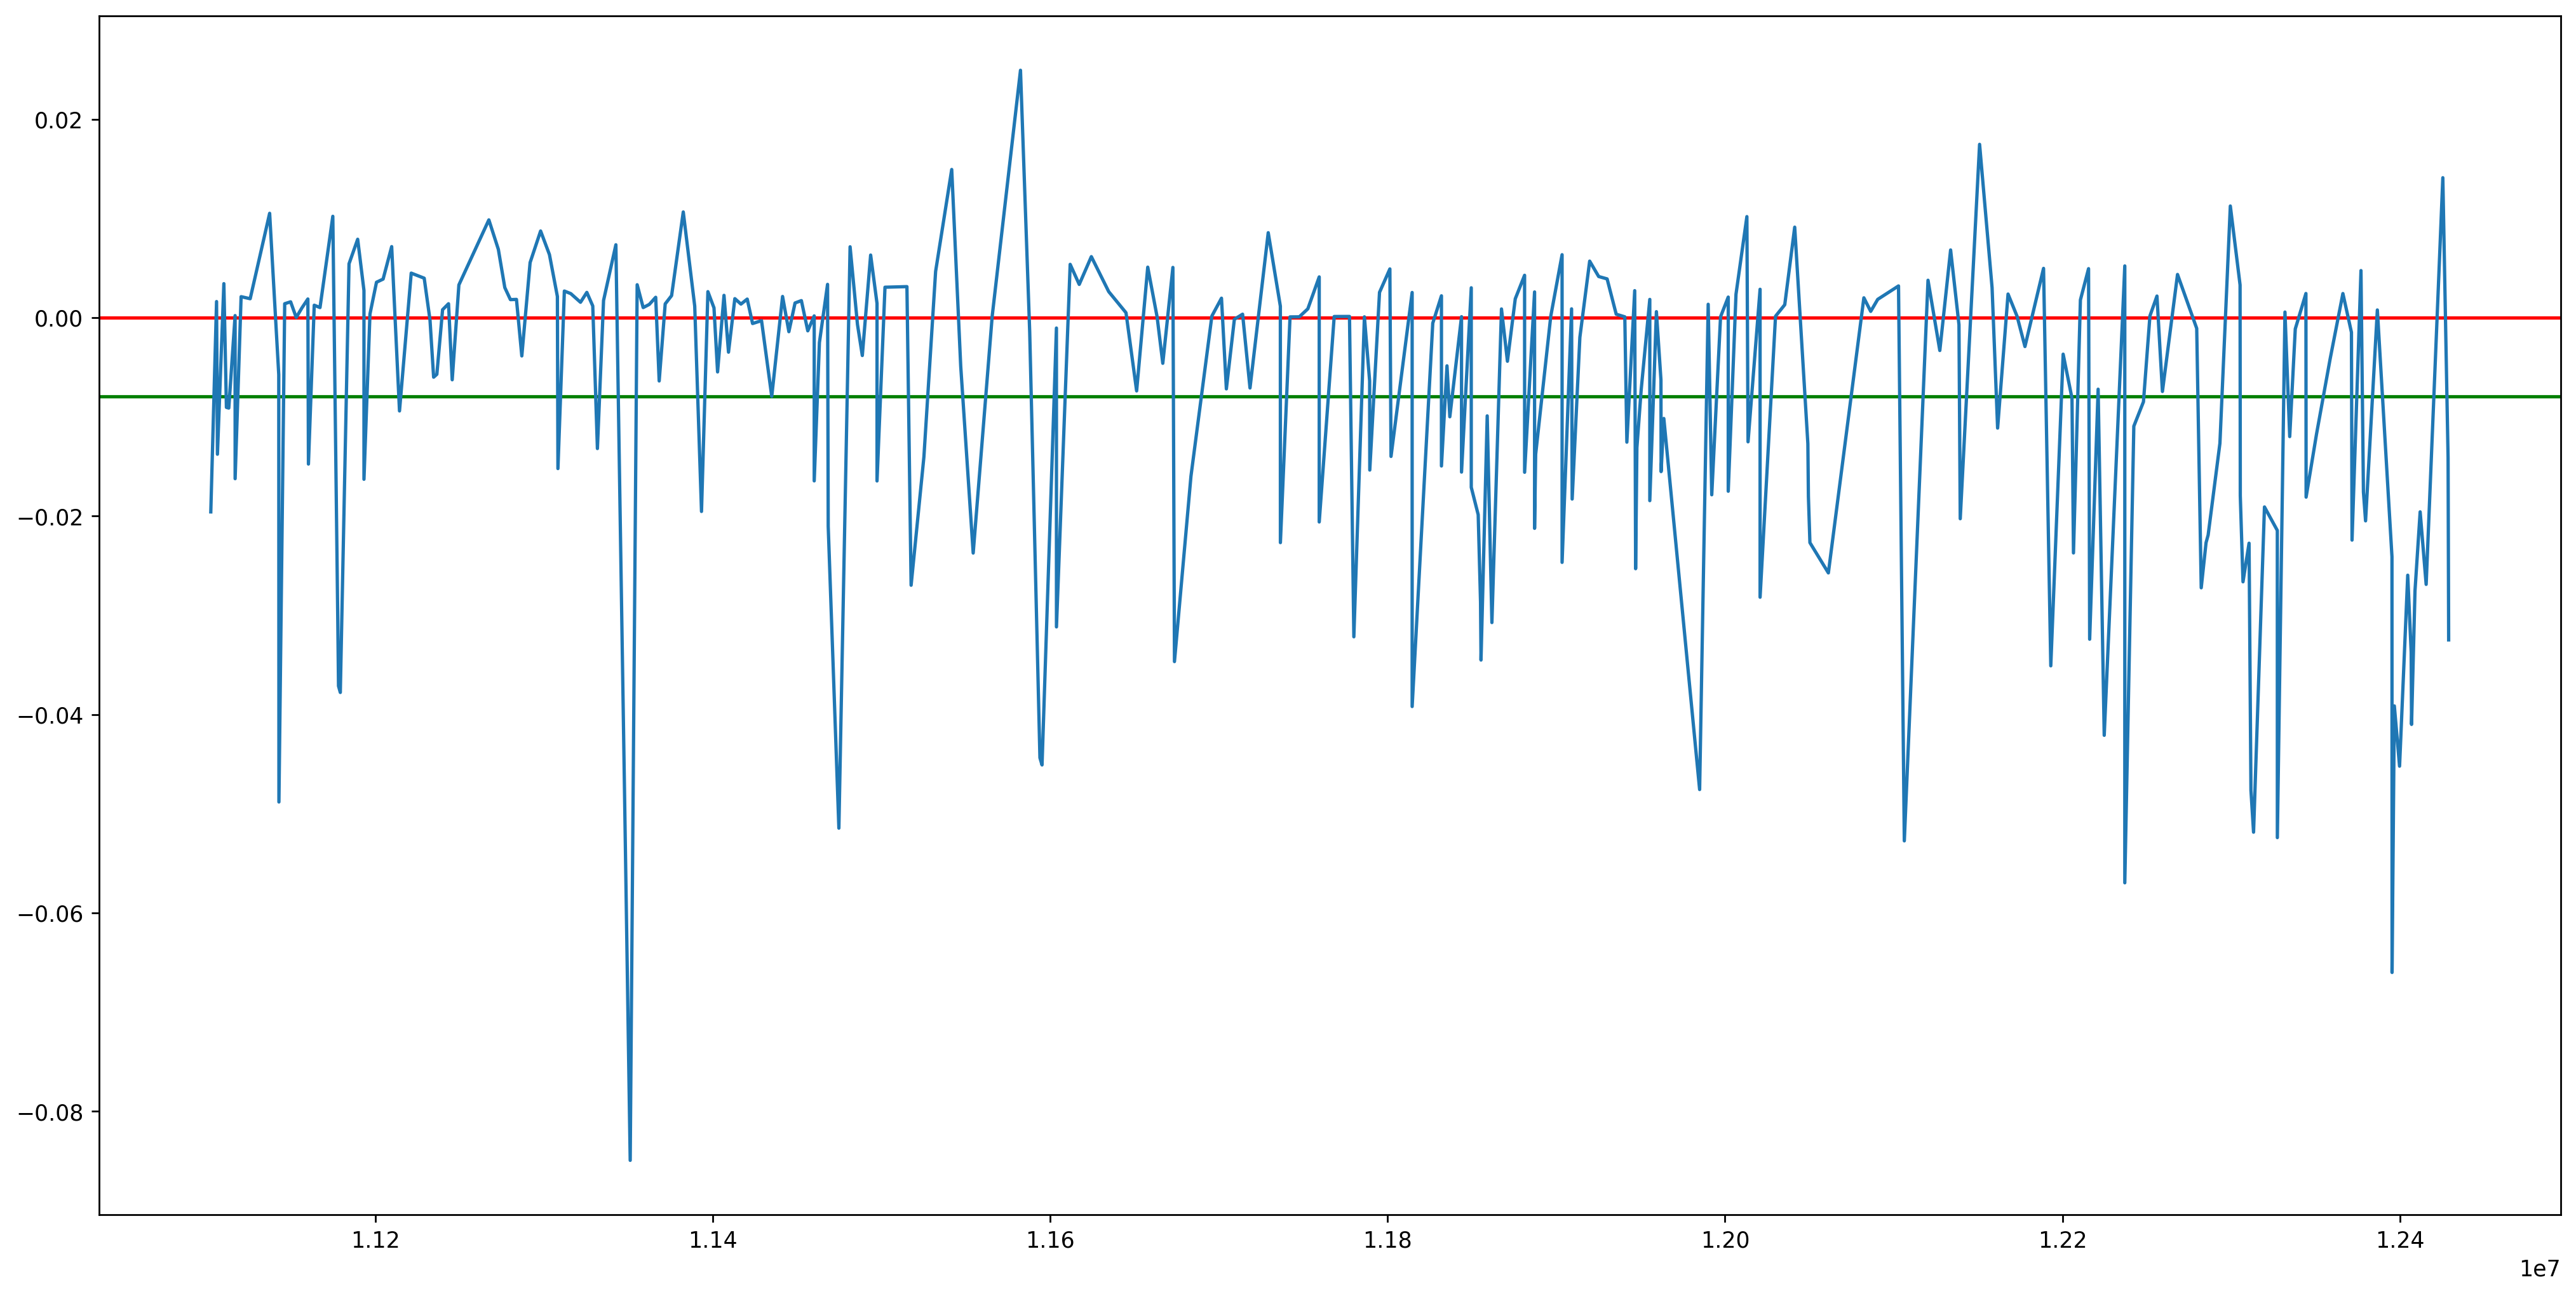

In [3]:
# reinvest_reward - transaction_fee over blocknumber plot
delta = rawDf["reinvest_reward"] - rawDf["transaction_fee"]

# get mean of delta
mean = delta.mean()
print("mean: " + str(mean))

plt.axhline(y=0, color='r', linestyle='-')
plt.axhline(y=mean, color='g', linestyle='-')
plt.plot(rawDf["blocknumber"].values, delta.values)
#plt.plot(rawDf["blocknumber"].values, rawDf["transaction_fee"].values, color='y')
#plt.plot(rawDf["blocknumber"].values, rawDf["reinvest_reward"].values, color='b')

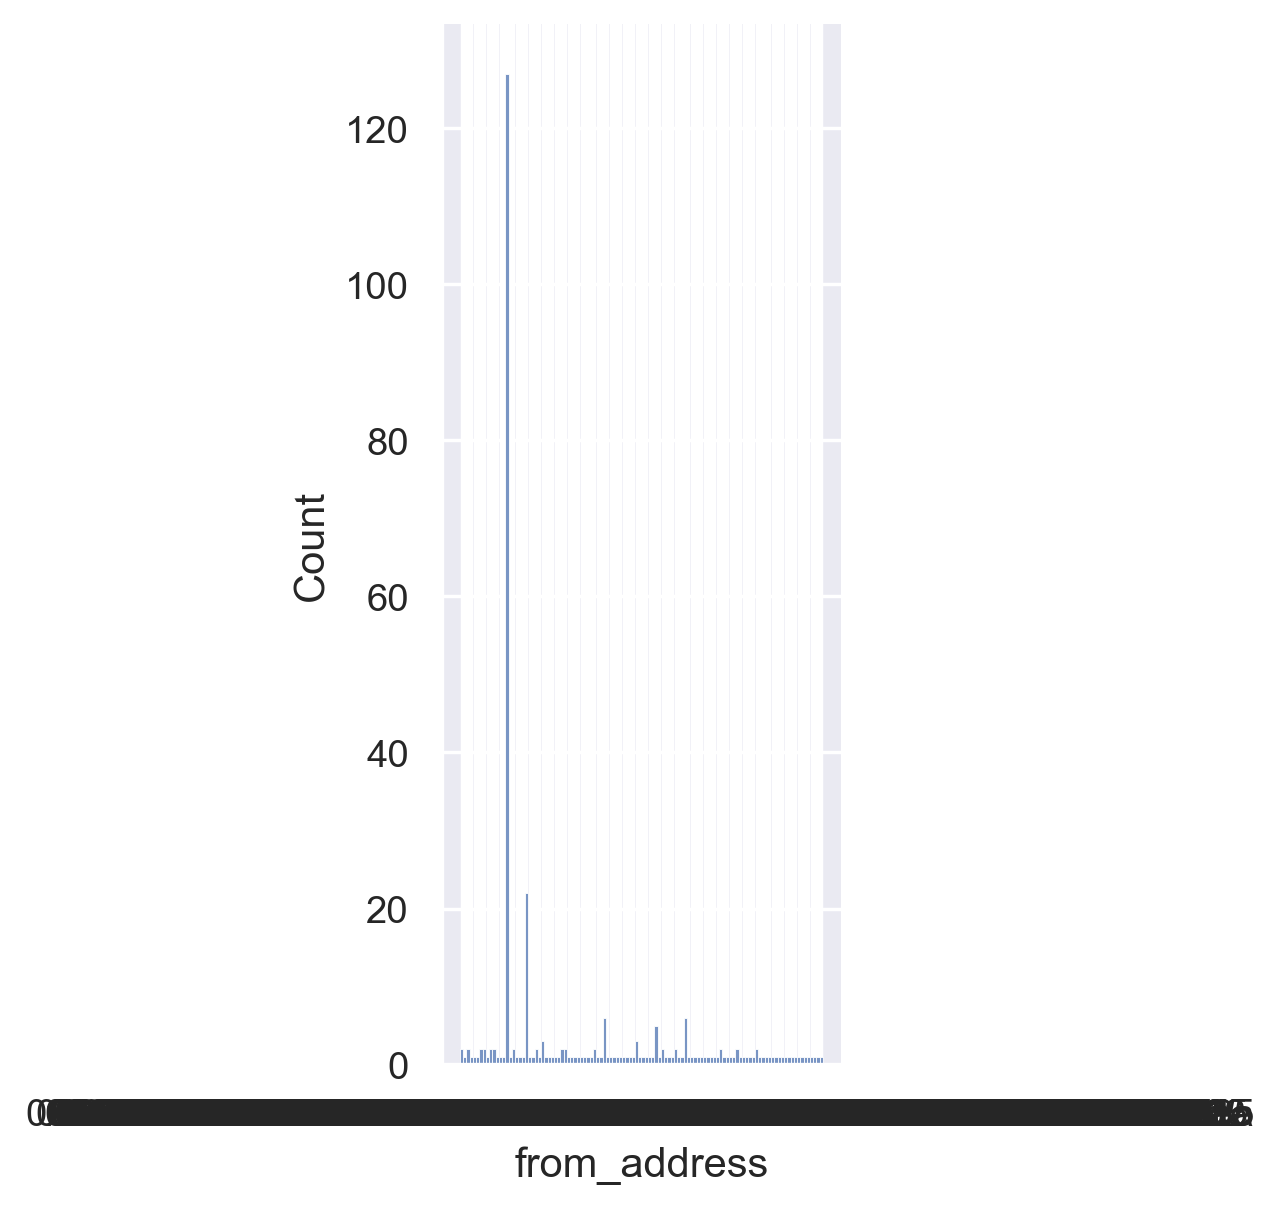

In [17]:
# plot distributions
sns.set(rc={'figure.figsize':(5,5)})

# transaction_fee
#sns.displot(data=rawDf["transaction_fee"])

# reinvested_amount
#sns.displot(data=rawDf["reinvested_amount"])

# from_address
sns.displot(data=rawDf["from_address"])

In [13]:
# numeric calculation of maximum profit with linear model
# get all positive values
pos_values = []
for val in delta:
    if (val > 0):
        pos_values.append(val)

# find optimal y value for max profit
_max = max(pos_values)
_min = min(pos_values)

results = []

steps = 100000
_range = _max - _min
step_width = _range / steps
current = _min
end = _max
while (current < end):
    _sum = 0
    for x in pos_values:
        if current < x:
            _sum += current
    results.append([current, _sum])
    current += step_width

0.0030082259461195254

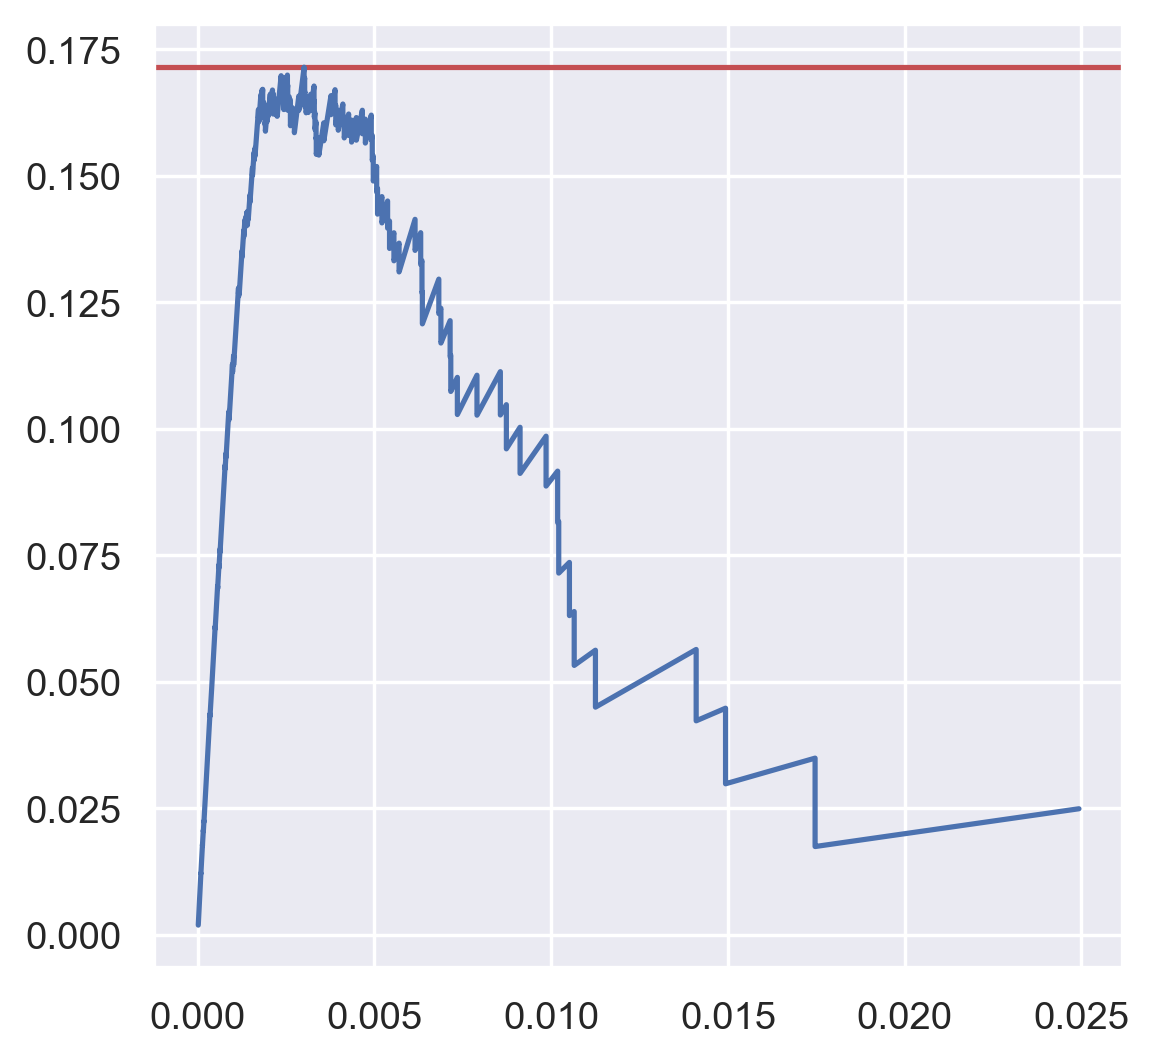

In [14]:
y_val_arr = []
profit_arr = []
for i in results:
    y_val_arr.append(i[0])
    profit_arr.append(i[1])

plt.axhline(y=max(profit_arr), color='r', linestyle='-')
plt.plot(y_val_arr, profit_arr)
y_val_arr[np.argmax(profit_arr)]

In [15]:
max(profit_arr)

0.17146887892881274

In [1]:
# instead of blocknumber use timestamp
# from_address -> see if there is competition
# transaction_fee over timestamp
# how to use max_fee_per_gas and _max_priority_fee_per_gas to reduce risk of overpaying on transaction costs
# how much profit margin per transaction is there at calcualted y value -> how many frontrun transactions can be allowed?
# average transaction fee, normal distribution etc.

In [2]:
# transaction_fee = gas_used_by_transaction * gas_price
# compare to effective gas price = min(gasFeeCap, baseFee + gasTipCap)
# and with actual transaction_fee

#calc_transaction_fee = rawDf["transaction_details"]["gas_used_by_transaction"] * rawDf["transaction_details"]["gas_price"]
#calc_transaction_fee

calc_transaction_fee = []
for detail in rawDf["transaction_details"]:
    calc_transaction_fee.append(float(detail["gas_used_by_transaction"]) * float(detail["gas_price"]))

test = calc_transaction_fee - rawDf["transaction_fee"]

# effective gas price = min(gasFeeCap, baseFee + gasTipCap)

effective_gas_price = []
for detail in rawDf["transaction_details"]:
    effective_gas_price.append(min(float(detail["max_fee_per_gas"]), float(detail["base_fee_per_gas"]) + float(detail["max_priority_fee_per_gas"])))

aaa = []
for aa in rawDf["transaction_details"]:
    aaa.append(float(aa["gas_price"]))

___sum = 0
for i in range(len(aaa)):
    ___sum += effective_gas_price[i] - aaa[i]

print(___sum)

NameError: name 'rawDf' is not defined

In [ ]:
# reinvested_amount + farm_fee + reinvest_reward = total_reinvested?
total_reinvested = rawDf["reinvested_amount"] + rawDf["farm_fee"] + rawDf["reinvest_reward"]
max(total_reinvested)

In [ ]:
yosha = rawDf["reinvest_reward"]/ rawDf["reinvested_amount"]
yosha

In [ ]:
# reward precentage reinvest_reward/reinvested_amount
reward_precentage = rawDf["reinvest_reward"] / rawDf["reinvested_amount"]
plt.plot(rawDf["blocknumber"].values, rawDf["reinvest_reward"].values, color='g')
#plt.plot(rawDf["blocknumber"].values, rawDf["reinvested_amount"].values/100, color='y')
plt.plot(rawDf["blocknumber"].values, reward_precentage.values)
reward_precentage.mean()

In [ ]:
# why is reinvest_reward sometimes > reinvested_amount
reward_precentage.argmax()

In [ ]:
df = rawDf.iloc[104]
df